# 1-2 파이썬에서 텍스트 파일과 엑셀 파일 읽기 - pandas

In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv', encoding='utf-8') 
# utf-8로 인코딩했더니 오류가 생겨서 cp949로 인코딩함 (파일 바꾸니 다시 utf-8로 가능해짐./2021-07-10기준)
CCTV_Seoul.head() # 위에서부터 5줄만 보여달라는 뜻

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [5]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True) 
# columns 이름이 마음에 안드니 바꿔주자
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [7]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N', # parse_cols를 썼더니 오류가 떠서, usecols를 써줌
                          encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 1-3 pandas 기초 익히기

In [9]:
import pandas as pd
import numpy as np

In [10]:
s = pd.Series([1,3,5,np.nan,6,8]) # series를 만들어보자 / list로 만들 수 있음.
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [11]:
dates = pd.date_range('20210101', periods=6) #date_range를 통해 날짜형의 데이터 만들 수 있음.
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])
# 6행 4열의 random 데이터, indes를 통해 dates를 지정

df

,A,B,C,D
2021-01-01,-0.809632,-1.188242,0.932753,-0.181473
2021-01-02,-0.608553,0.820781,0.775330,-0.382048
2021-01-03,-1.675521,-0.056203,-1.900194,-0.444862
2021-01-04,-0.224275,-0.171294,-0.805918,-1.131116
2021-01-05,-0.623177,0.288599,2.059853,0.265003
2021-01-06,0.971398,-0.457134,-0.994854,0.148520


In [13]:
df.head(3) 
#head() 쓸 때, 괄호 안에 숫자를 넣어두면 그 숫자만큼의 행을 볼 수 있음.

,A,B,C,D
2021-01-01,-0.809632,-1.188242,0.932753,-0.181473
2021-01-02,-0.608553,0.820781,0.775330,-0.382048
2021-01-03,-1.675521,-0.056203,-1.900194,-0.444862


In [14]:
df.index 
#DataFrame의 인덱스를 확인할 수 있음.

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns 
#DataFrame 컬럼을 확인할 수 있음.

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values 
#DataFrame 안에 들어 있는 내용을 확인할 수 있음.

array([[-0.80963222, -1.18824183,  0.93275312, -0.18147274],
       [-0.60855258,  0.82078097,  0.77532959, -0.38204766],
       [-1.6755214 , -0.0562025 , -1.90019379, -0.44486181],
       [-0.22427491, -0.17129352, -0.80591774, -1.13111627],
       [-0.6231769 ,  0.28859868,  2.05985264,  0.26500328],
       [ 0.97139794, -0.45713441, -0.9948535 ,  0.14851993]])

In [17]:
df.info() 
#DataFrame의 개요를 알 수 있음.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [18]:
df.describe() 
#DataFrame의 통계적 개요를 확인할 수 있음.

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.494960,-0.127249,0.011162,-0.287663
std,0.865513,0.680178,1.480769,0.500401
min,-1.675521,-1.188242,-1.900194,-1.131116
25%,-0.763018,-0.385674,-0.947620,-0.429158
50%,-0.615865,-0.113748,-0.015294,-0.281760
75%,-0.320344,0.202398,0.893397,0.066022
max,0.971398,0.820781,2.059853,0.265003


In [19]:
df.sort_values(by='B', ascending=False)
#sort_value 명령은 by로 지정된 컬럼을 기준으로 정렬.
#이 때 ascending 옵션을 사용하면 내림차순이나 오름차순으로 정렬시킬 수 있음.

,A,B,C,D
2021-01-02,-0.608553,0.820781,0.775330,-0.382048
2021-01-05,-0.623177,0.288599,2.059853,0.265003
2021-01-03,-1.675521,-0.056203,-1.900194,-0.444862
2021-01-04,-0.224275,-0.171294,-0.805918,-1.131116
2021-01-06,0.971398,-0.457134,-0.994854,0.148520
2021-01-01,-0.809632,-1.188242,0.932753,-0.181473


In [20]:
df

,A,B,C,D
2021-01-01,-0.809632,-1.188242,0.932753,-0.181473
2021-01-02,-0.608553,0.820781,0.775330,-0.382048
2021-01-03,-1.675521,-0.056203,-1.900194,-0.444862
2021-01-04,-0.224275,-0.171294,-0.805918,-1.131116
2021-01-05,-0.623177,0.288599,2.059853,0.265003
2021-01-06,0.971398,-0.457134,-0.994854,0.148520


In [21]:
df['A']

2021-01-01   -0.809632
2021-01-02   -0.608553
2021-01-03   -1.675521
2021-01-04   -0.224275
2021-01-05   -0.623177
2021-01-06    0.971398
Freq: D, Name: A, dtype: float64

In [22]:
df[0:3]

,A,B,C,D
2021-01-01,-0.809632,-1.188242,0.932753,-0.181473
2021-01-02,-0.608553,0.820781,0.775330,-0.382048
2021-01-03,-1.675521,-0.056203,-1.900194,-0.444862


In [23]:
df['20210102':'20210104']

,A,B,C,D
2021-01-02,-0.608553,0.820781,0.775330,-0.382048
2021-01-03,-1.675521,-0.056203,-1.900194,-0.444862
2021-01-04,-0.224275,-0.171294,-0.805918,-1.131116


In [24]:
df.loc[dates[0]]
# 만들었던 dates 변수를 이용해서 특정 날짜의 데이터만 보고 싶으면 df.loc 명령을 사용할 수 있음

A   -0.809632
B   -1.188242
C    0.932753
D   -0.181473
Name: 2021-01-01 00:00:00, dtype: float64

In [25]:
df.loc[:,['A','B']]

,A,B
2021-01-01,-0.809632,-1.188242
2021-01-02,-0.608553,0.820781
2021-01-03,-1.675521,-0.056203
2021-01-04,-0.224275,-0.171294
2021-01-05,-0.623177,0.288599
2021-01-06,0.971398,-0.457134


In [26]:
df.loc[dates[0],['A','B']]
# 이걸 보니, df.loc[[행],[열]] 이런 식으로 위치 지정할 수 있는 듯

A   -0.809632
B   -1.188242
Name: 2021-01-01 00:00:00, dtype: float64

In [27]:
df.loc['20210102':'20210104',['A','B']]

,A,B
2021-01-02,-0.608553,0.820781
2021-01-03,-1.675521,-0.056203
2021-01-04,-0.224275,-0.171294


In [28]:
df.loc['20210102',['A','B']]

A   -0.608553
B    0.820781
Name: 2021-01-02 00:00:00, dtype: float64

In [29]:
df.loc[dates[0],['A']]

A   -0.809632
Name: 2021-01-01 00:00:00, dtype: float64

In [30]:
df.iloc[3]
# loc과 달리 행과 열의 번호를 이요해서 데이터에 바로 접근하고 싶을 때 사용하는 명령
# 콜론(:)을 사용하면 전체를 의미함.

A   -0.224275
B   -0.171294
C   -0.805918
D   -1.131116
Name: 2021-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5,0:2]
# 3번째부터 5번째 '앞', 뒤에 쓰이는 숫자가 이 숫자 '앞'이라는 소리였구만.

,A,B
2021-01-04,-0.224275,-0.171294
2021-01-05,-0.623177,0.288599


In [32]:
df.iloc[[1,2,4],[0,2]]
# 범위가 아니라 콤마(,)로 행이나 열을 지정해서 데이터를 가져올 수도 있음.

,A,C
2021-01-02,-0.608553,0.775330
2021-01-03,-1.675521,-1.900194
2021-01-05,-0.623177,2.059853


In [33]:
df

,A,B,C,D
2021-01-01,-0.809632,-1.188242,0.932753,-0.181473
2021-01-02,-0.608553,0.820781,0.775330,-0.382048
2021-01-03,-1.675521,-0.056203,-1.900194,-0.444862
2021-01-04,-0.224275,-0.171294,-0.805918,-1.131116
2021-01-05,-0.623177,0.288599,2.059853,0.265003
2021-01-06,0.971398,-0.457134,-0.994854,0.148520


In [34]:
df[df.A > 0]
# 컬럼 A에서 0보다 큰 행만 얻고 싶을 때

,A,B,C,D
2021-01-06,0.971398,-0.457134,-0.994854,0.14852


In [35]:
df[df > 0]
# 데이터 전체에서 조건을 걸면 아닌 곳은 NaN로 처리됨.

,A,B,C,D
2021-01-01,NaN,NaN,0.932753,NaN
2021-01-02,NaN,0.820781,0.775330,NaN
2021-01-03,NaN,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,NaN,0.288599,2.059853,0.265003
2021-01-06,0.971398,NaN,NaN,0.148520


In [36]:
df2 = df.copy()
# DataFrame을 복사할 때 = 기호를 이요해서 복사하면 실제 데이터의 내용이 복사되는 것이 아니라 위치만 복사
# 따라서 원본 데이터는 하나만 남게 됨.
# 내용까지 복사하고 싶으면 copy() 옵션을 붙이면 된다.

In [37]:
df2['E'] = ['one','one','two','three','four','three'] 
# 원래 있는 df에서 새로운 컬럼을 추가하고 싶을 때는 이렇게
df2

,A,B,C,D,E
2021-01-01,-0.809632,-1.188242,0.932753,-0.181473,one
2021-01-02,-0.608553,0.820781,0.775330,-0.382048,one
2021-01-03,-1.675521,-0.056203,-1.900194,-0.444862,two
2021-01-04,-0.224275,-0.171294,-0.805918,-1.131116,three
2021-01-05,-0.623177,0.288599,2.059853,0.265003,four
2021-01-06,0.971398,-0.457134,-0.994854,0.148520,three


In [38]:
[df2['E'].isin(['two','four'])]
# 새로 만든 E 컬럼에 two와 four이 있는지 확인하고 싶을 때는 isin 명령을 쓰자.

[2021-01-01    False
 2021-01-02    False
 2021-01-03     True
 2021-01-04    False
 2021-01-05     True
 2021-01-06    False
 Freq: D, Name: E, dtype: bool]

In [39]:
df2[df2['E'].isin(['two','four'])]
# 바로 위에서 나온 조건들을 통해서 원하는 데이터만 뽑을 수 있음.

,A,B,C,D,E
2021-01-03,-1.675521,-0.056203,-1.900194,-0.444862,two
2021-01-05,-0.623177,0.288599,2.059853,0.265003,four


In [40]:
df.apply(np.cumsum)
# 좀 더 통계적인 값을 알고 싶으면 apply 명령.
# 누적합을 알고 싶으면 numpy의 cumsum을 이용하면 됨.

,A,B,C,D
2021-01-01,-0.809632,-1.188242,0.932753,-0.181473
2021-01-02,-1.418185,-0.367461,1.708083,-0.563520
2021-01-03,-3.093706,-0.423663,-0.192111,-1.008382
2021-01-04,-3.317981,-0.594957,-0.998029,-2.139498
2021-01-05,-3.941158,-0.306358,1.061824,-1.874495
2021-01-06,-2.969760,-0.763493,0.066970,-1.725975


In [41]:
df.apply(lambda x: x.max() - x.min())
# 최댓값과 최솟값의 차이를 알고 싶다면, lambda를 이용하자.

A    2.646919
B    2.009023
C    3.960046
D    1.396120
dtype: float64

# 1-4 pandas를 이용해서 CCTV와 인구 현황 데이터 파악하기

In [42]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [43]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)
# CCTV 수가 낮은 구별 순으로 정리한 것

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [44]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [45]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] + \
                            CCTV_Seoul['2016년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)
# 2014 ~ 2016년까지 최근 3년간 CCTV 수를 더하고 2013년 이전 CCTV 수로 나눠서 최근 3년간 CCTV 증가율을 계산

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [46]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [47]:
pop_Seoul.drop([0], inplace=True)
# drop을 사용하면 행을 지울 수 있음.
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [48]:
pop_Seoul['구별'].unique()
# unique 명령은 반복된 데이터는 하나로 나타내서 한 번 이상 나타난 데이터를 확인하는 것

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [49]:
pop_Seoul[pop_Seoul['구별'].isnull()]
# isnull을 사용하면 NaN 데이터 추출 가능

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [50]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [51]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [52]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [53]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [54]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [55]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [56]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 1-5 pandas 고급 기능 - 두 DataFrame 병합하기

In [57]:
df1 = pd.DataFrame({'A': ['A0','A1','A2','A3'],
                   'B': ['B0','B1','B2','B3'],
                   'C': ['C0','C1','C2','C3'],
                   'D': ['D0','D1','D2','D3']},
                  index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4','A5','A6','A7'],
                   'B': ['B4','B5','B6','B7'],
                   'C': ['C4','C5','C6','C7'],
                   'D': ['D4','D5','D6','D7']},
                  index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8','A9','A10','A11'],
                   'B': ['B8','B9','B10','B11'],
                   'C': ['C8','C9','C10','C11'],
                   'D': ['D8','D9','D10','D11']},
                  index=[8, 9, 10, 11])

In [58]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [59]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [60]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [61]:
result = pd.concat([df1, df2, df3])
# 데이터들을 열 방향으로 단순히 합치는 것은 concat
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [62]:
result = pd.concat([df1, df2, df3], keys=['x','y','z'])
# concat 명령에 keys 옵션으로 구분할 수 있음.
# 이렇게 key 지정된 구분은 다중 index가 되어 level을 형성
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [63]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [64]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [65]:
result.index.get_level_values(1)
# 다중 index라는 말이 쉽게 말해서 index끼리 level의 차이를 만들어주는 거구나

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [66]:
df4 = pd.DataFrame({'B': ['B2','B3','B6','B7'],
                   'D': ['D2','D3','D6','D7'],
                   'F': ['F2','F3','F6','F7']},
                  index=[2, 3, 6, 7])
result = pd.concat([df1, df4], axis=1)

In [67]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [68]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [69]:
result
# index를 기준으로 concat되는데, 값을 가질 수 없는 곳에는 NaN이 저장되는 것.

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [70]:
result = pd.concat([df1, df4], axis=1, join='inner')
# 공통된 index로 합치고 공통되지 않은 index의 데이터는 버리도록 하는 옵션이 join='inner'
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [71]:
result = pd.concat([df1, df4], ignore_index=True)
# axis=1 안했기 때문에 그냥 열 방향으로 합쳐짐
# 두 데이터의 index를 무시하고 합친 후 다시 index를 부여하고 싶으면 ignore_index=True 사용
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [72]:
left = pd.DataFrame({'key': ['K0','K4','K2','K3'],
                   'A': ['A0','A1','A2','A3'],
                   'B': ['B0','B1','B2','B3']})
right = pd.DataFrame({'key': ['K0','K1','K2','K3'],                     
                   'C': ['C0','C1','C2','C3'],
                   'D': ['D0','D1','D2','D3']})

In [73]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [74]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [75]:
pd.merge(left, right, on='key')
# merge 명령을 사용하면 두 데이터에 공통으로 있는 컬럼을 기준으로 합칠 수 있음.
# merge 기준을 설정하는 on 옵션을 'key'로 설정해주면 'key'를 기준으로 합쳐짐.

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [76]:
pd.merge(left, right, how='left', on='key')
# how 옵션을 사용하면 합치는 데이터 중 하나를 기준으로 합칠 수 있음.

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [77]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3
3,K1,NaN,NaN,C1,D1


In [78]:
pd.merge(left, right, how='outer', on='key')
# how 옵션 중 outer로 설정하면 합집합처럼 합쳐짐.
# 공통된 요소가 아닌 곳은 NaN 처리가 됨.

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [79]:
pd.merge(left, right, how='inner', on='key')
# how 옵션 중 inner로 설정하면 교집합처럼 합쳐짐.
# 공통된 요소만 가짐.

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


# 1-6 CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [80]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
# 두 데이터의 공통된 컬럼인 '구별'로 merge
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [81]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
#행을 삭제하는 것은 drop, 열을 삭제하는 것은 del
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [82]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [83]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])
# 상관계수를 계산하는 명령이 numpy에 있는 corrcoef 명령

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [84]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [85]:
np.corrcoef(data_result['인구수'],data_result['소계'])
# 인구수와 CCTV 개수 간의 상관계수가 0.3이기에 약한 상관관계가 있다고 볼 수 있음.
# 따라서 CCTV와 인구수의 관계를 들여다봅시다.

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [86]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [87]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 1-7 파이썬의 대표 시각화 도구 - Matplotlib

In [88]:
import matplotlib.pyplot as plt
# matplotlib 중 그래프를 그리는 모듈은 matplotlib.pyplot
%matplotlib inline
# matplotlib inline은 그래프의 결과를 출력 세션에 나타나게 하는 설정

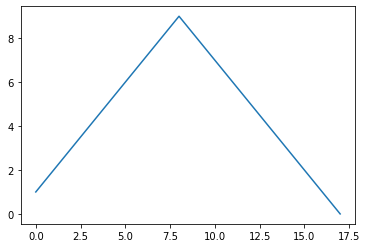

In [89]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [90]:
import numpy as np
t = np.arange(0,12,0.01)
# 정의역의 범위, 데이터의 간격 설정해주고 데이터 생성
y = np.sin(t)
# 이를 sin그래프 안에 넣어줌.

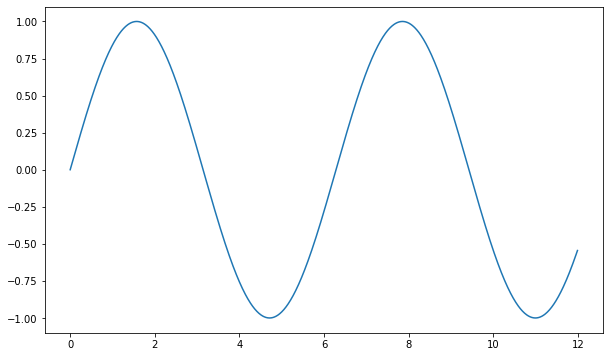

In [91]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.show()

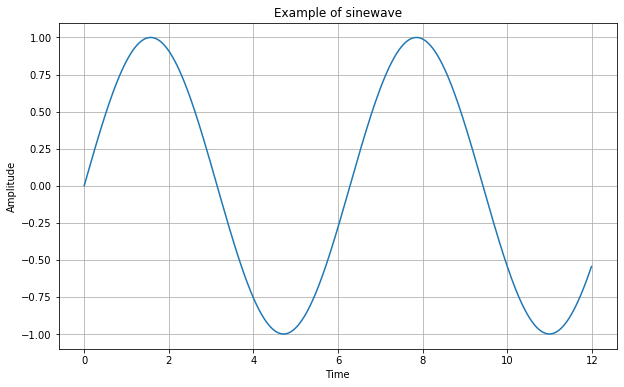

In [92]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

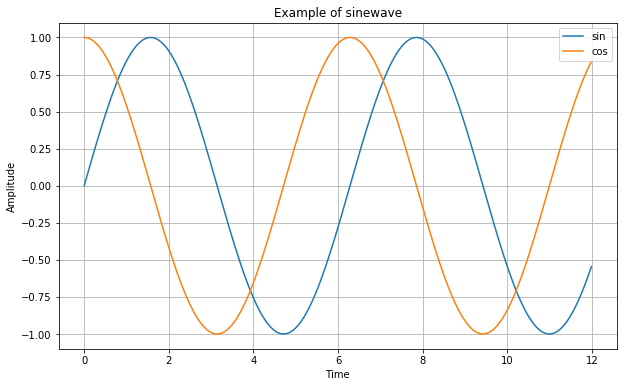

In [93]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

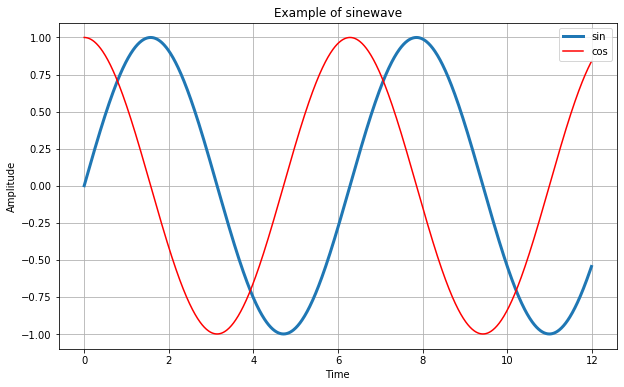

In [94]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
# lw 옵션으로 선의 굵기 지정 가능
plt.plot(t, np.cos(t), 'r', label='cos')
# color 옵션으로 색상 지정 가능
plt.grid()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

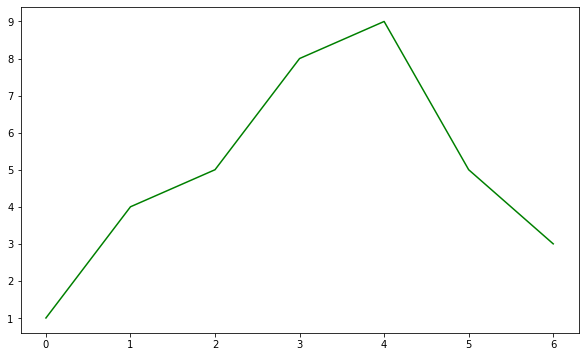

In [95]:
t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
# 바로 위에 줄말고 이런 식으로도 색상 지정 가능
plt.show()

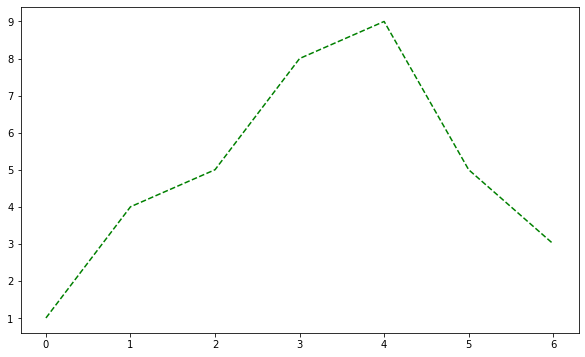

In [96]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
# linestyle 옵션으로 선 스타일 지정 가능
plt.show()

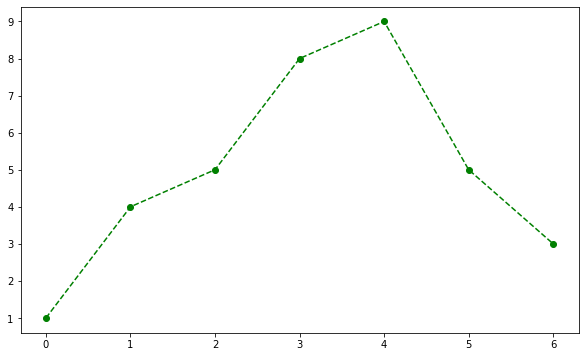

In [97]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
# marker 옵션으로 데이터가 존재하는 곳에 마킹 가능
plt.show()

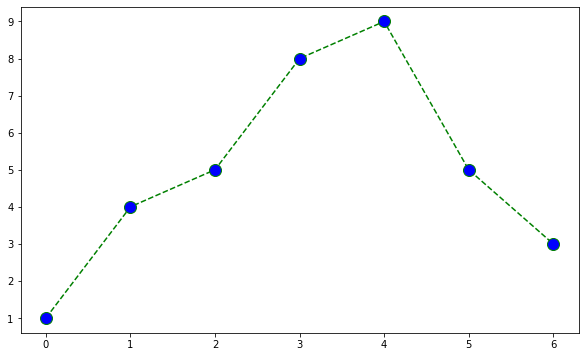

In [98]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=12)
# markerfacecolor 옵션과 markersize 옵션으로 마커의 크기와 색상 지정 가능
plt.show()

In [99]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

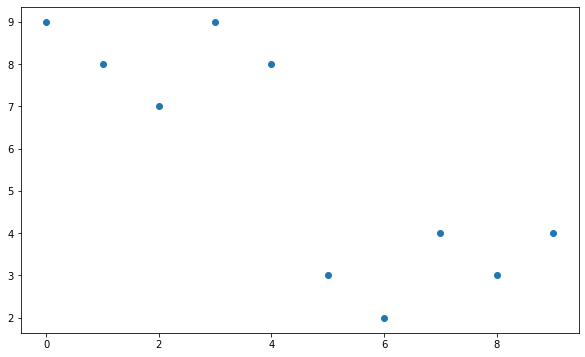

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
# plot은 선을 그리는 명령, scatter는 점을 그리는 명령인듯?
plt.show()

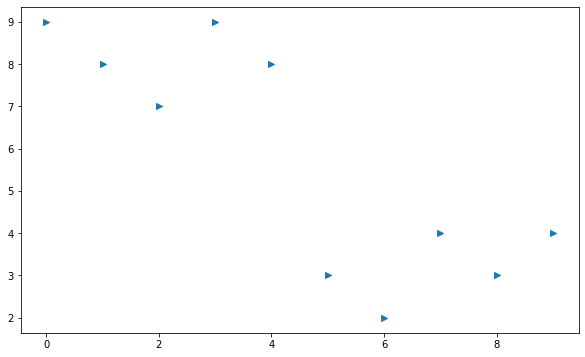

In [101]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
# marker 지정 가능
plt.show()

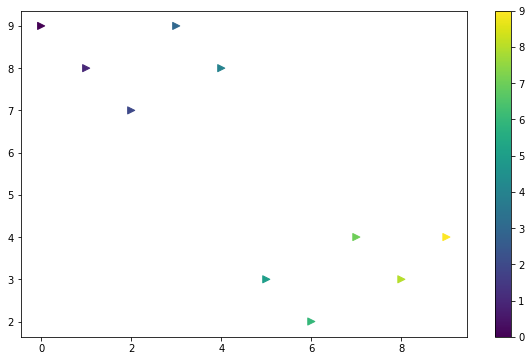

In [102]:
colormap = t
plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
# x축 값인 t에 따라 색상을 바꾸는 colormap을 지정할 수 있음
# 이때 s 옵션은 마커의 크기
plt.colorbar()
plt.show()

In [103]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)
# numpy의 랜덤변수 함수를 이용해서 데이터를 3개 만듦
# 이때 loc 옵션으로 평균값을, scale 옵션으로 표준편차를 지정

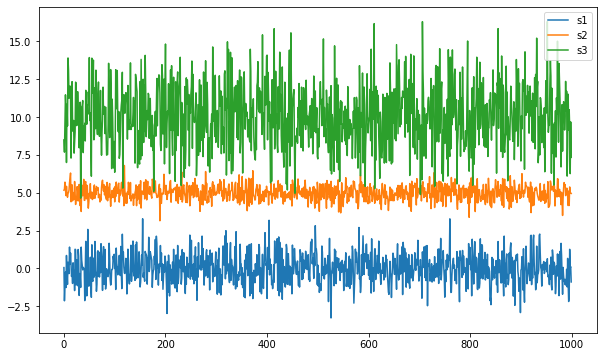

In [104]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

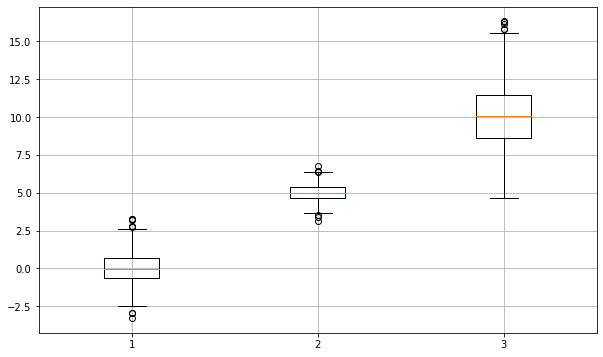

In [105]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

# 1-8 CCTV 현황 그래프로 분석하기

In [106]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~')

In [107]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


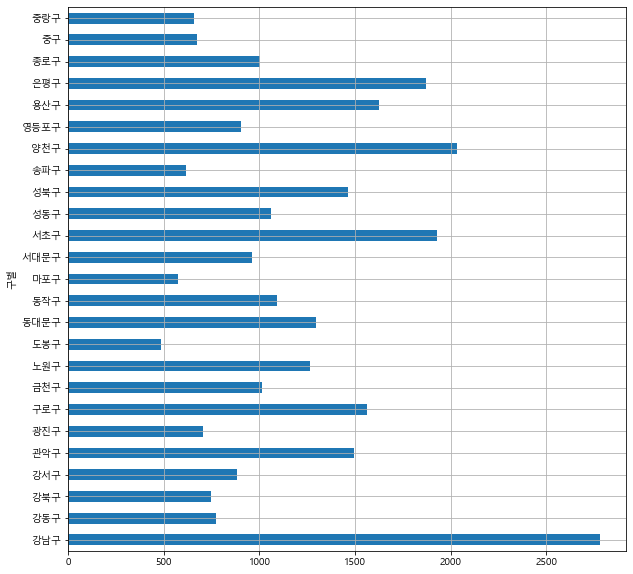

In [108]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
# pandas 데이터 뒤에 plot 명령을 붙이면 바로 그려줌.
# kind = 'barh'로 지정 -> 수평바(bar)로 그려줌
plt.show()

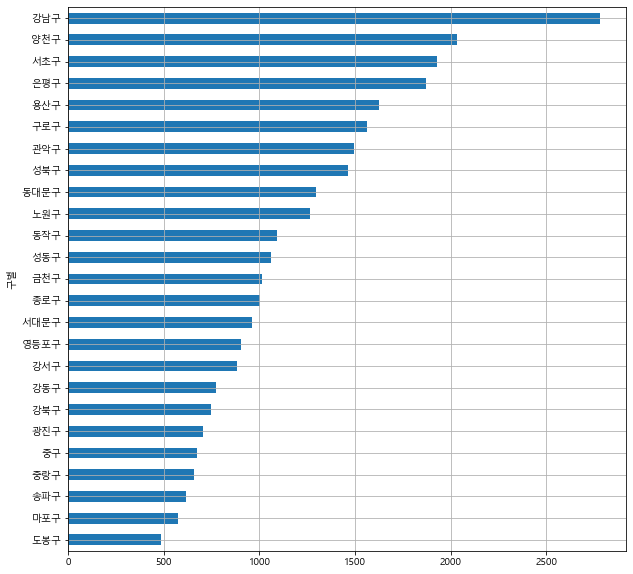

In [109]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

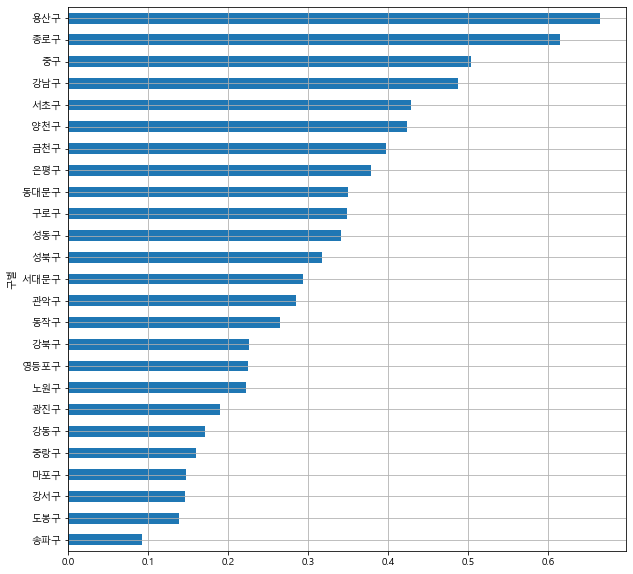

In [110]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

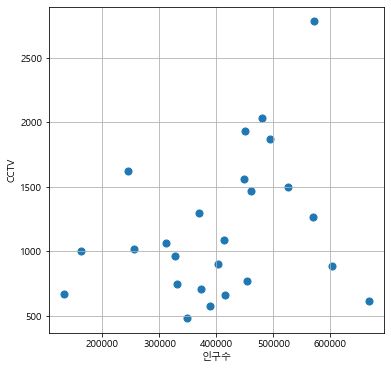

In [111]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [112]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [113]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
# polyfit 명령으로 직선을 그리기 위해서 x축과 y축 데이터를 얻어야 함.
# x축 데이터는 numpy의 linspace로 만들기
# y축 데이터는 poly1d로 만들기

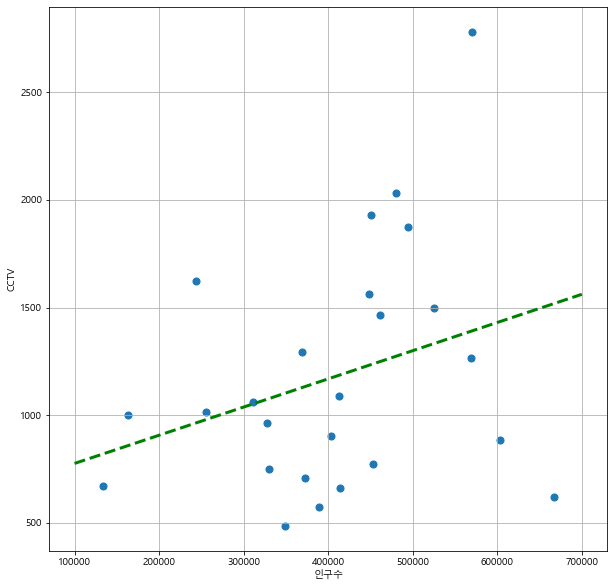

In [114]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

여기서 우리가 추가하고 싶은 장치는 두 가지인데, 하나는 이 직선이 전체 데이터의 대푯값 역할을 한다면, 즉 예를 들어 인구수가 300000일 때는 CCTV는 1100 정도여야 한다는 개념을 이야기하는 것이라면 그 경향에서 멀리 있는 구는 이름이 같이 나타나도록 하고 싶다는 것과 직선에서 멀어질수록 다른 색을 나타내도록 하고 싶다는 것.

In [115]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


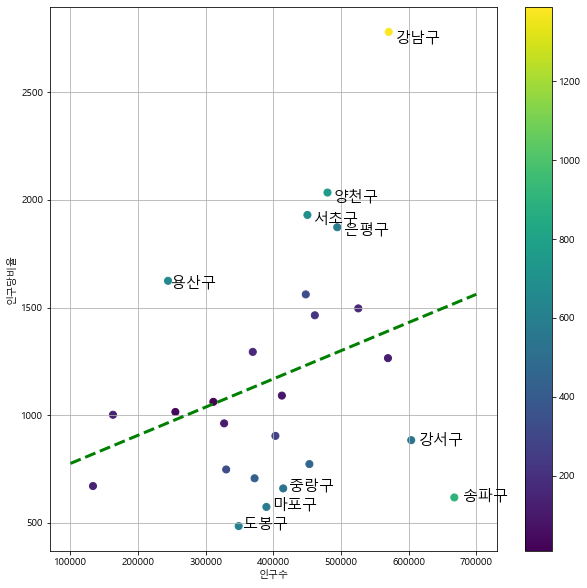

In [116]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

직선을 기준으로 위에 있는 '강남구', '양천구', '서초구', '은평구', '용산구'는 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치된 지역.
그리고 '송파구', '강서구', '중랑구', '마포구', '도봉구'는 일반적인 경향보다 CCTV가 적게 설치된 지역.
특히 '강남구'는 월등히 많은 CCTV가 설치됐지만, '송파구'는 인구수에 비해 너무나도 적은 수의 CCTV를 가지고 있다.

# 드디어 1장 끝! 2장도 열심히 해보자!